# Analyse exploratoire des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_21= pd.read_csv('modified data\data21.csv')
df_20= pd.read_csv('modified data\data20.csv')
df_19= pd.read_csv('modified data\data19.csv')
df_21nd= pd.read_csv('unduplicated data\data21nd.csv')
df_20nd= pd.read_csv('unduplicated data\data20nd.csv')
df_19nd= pd.read_csv('unduplicated data\data19nd.csv')

## Premiers constats

In [37]:
print(len(df_19),len(df_20),len(df_21))

622 592 626


On a environ 600 lignes dans chacune de nos bases de données scrappées

In [3]:
d19 = df_19.groupby('name')['name'].transform('size').value_counts()
for i in range(1,len(d19)+1):
    print("Il y a "+str(int(d19[i]/i))+" joueurs qui apparaissent "+str(i)+" fois dans la base de 2019")

Il y a 444 joueurs qui apparaissent 1 fois dans la base de 2019
Il y a 80 joueurs qui apparaissent 2 fois dans la base de 2019
Il y a 6 joueurs qui apparaissent 3 fois dans la base de 2019


In [4]:
d20 = df_20.groupby('name')['name'].transform('size').value_counts()
for i in range(1,len(d20)+1):
    print("Il y a "+str(int(d20[i]/i))+" joueurs qui apparaissent "+str(i)+" fois dans la base de 2020")

Il y a 470 joueurs qui apparaissent 1 fois dans la base de 2020
Il y a 58 joueurs qui apparaissent 2 fois dans la base de 2020
Il y a 2 joueurs qui apparaissent 3 fois dans la base de 2020


In [5]:
d21 = df_21.groupby('name')['name'].transform('size').value_counts()
for i in range(1,len(d21)+1):
    print("Il y a "+str(int(d21[i]/i))+" joueurs qui apparaissent "+str(i)+" fois dans la base de 2021")

Il y a 461 joueurs qui apparaissent 1 fois dans la base de 2021
Il y a 72 joueurs qui apparaissent 2 fois dans la base de 2021
Il y a 7 joueurs qui apparaissent 3 fois dans la base de 2021


Ceci s'explique par la possibilité de transfert de joueurs au cours de la saison : ils apparaissent ainsi dans les équipes dans lequelles ils ont joué

In [35]:
df_19[df_19.groupby('name')['name'].transform('size') > 1].sort_values(by=['name']).head()

,and_ones,assist_percentage,assists,assists_per_poss,block_percentage,blocking_fouls,blocks,blocks_per_poss,box_plus_minus,center_percentage,...,usage_percentage,value_over_replacement_player,weight,win_shares,win_shares_per_48_minutes,name,team,points_per_game,reb_per_game,ast_per_game
558,NaN,13.7,128.0,4.6,1.3,NaN,21.0,0.7,-1.2,0,...,19.0,0.3,214,1.5,0.052,Alec Burks,CLE,8.765625,3.671875,2.000000
90,NaN,13.7,128.0,4.6,1.3,NaN,21.0,0.7,-1.2,0,...,19.0,0.3,214,1.5,0.052,Alec Burks,SAC,8.765625,3.671875,2.000000
424,NaN,13.7,128.0,4.6,1.3,NaN,21.0,0.7,-1.2,0,...,19.0,0.3,214,1.5,0.052,Alec Burks,UTA,8.765625,3.671875,2.000000
212,NaN,17.1,24.0,6.3,0.9,NaN,2.0,0.5,-7.1,0,...,16.8,-0.2,213,-0.1,-0.027,Andrew Harrison,NOP,3.176471,1.176471,1.411765
288,NaN,17.1,24.0,6.3,0.9,NaN,2.0,0.5,-7.1,0,...,16.8,-0.2,213,-0.1,-0.027,Andrew Harrison,MEM,3.176471,1.176471,1.411765


**Problème** : pour ces joueurs, leurs statistiques sont les mêmes quelque soit l'équipe pour laquelle ils jouent, et non pas leurs statistiques liées uniquement à leurs matchs joués pour chaque équipe
Selon ce que l'on va faire par la suite, nous déciderons de garder ou non l'une de ces les lignes similaires (qui ne diffèrent que par la colonne 'team')

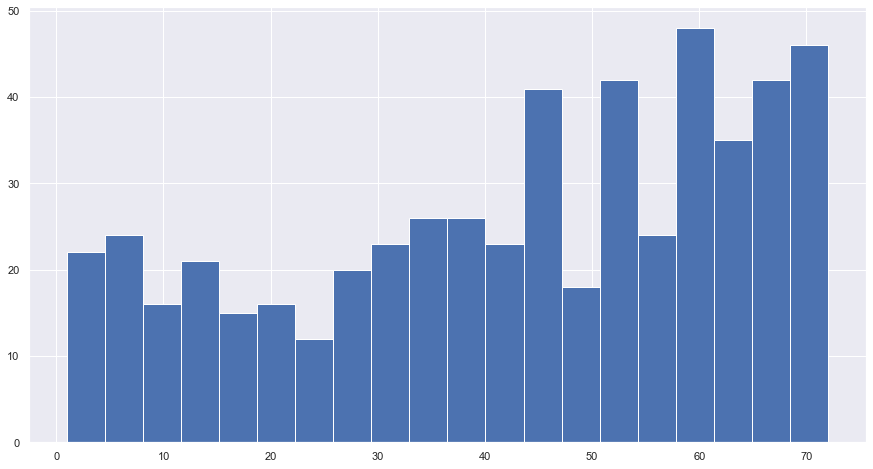

In [125]:
df_21nd['games_played'].hist(bins=20)

On observe de nombreux joueurs dans la base qui jouent moins de 20 matchs pendant la saison 2020-21 ; pour les modélisation, on peut considérer que 20 matchs joués ne sont pas suffisant pour rendre les performances d'un joueur significative par rapport à son "vrai niveau" : on omettra donc ces observations dans la partie modélisation.

## Statistiques descriptives sur les variables qui nous intéressent

### Variable 'salary'

In [7]:
print("Il y a "+str(df_19['salary'].isnull().sum())+" salaires inconnus dans la base de 2019")
print("Il y a "+str(df_20['salary'].isnull().sum())+" salaires inconnus dans la base de 2020")
print("Il y a "+str(df_21['salary'].isnull().sum())+" salaires inconnus dans la base de 2021")

Il y a 49 salaires inconnus dans la base de 2019
Il y a 51 salaires inconnus dans la base de 2020
Il y a 60 salaires inconnus dans la base de 2021


Ces joueurs sont des joueurs qui jouent peu voire très peu (voir histogramme ci-dessous); ainsi, dans la partie modélisation, comme nous ne sélectionnerons que les joueurs ayant joué au moins 20 matchs, l'absence de ces données n'aura pas un très grand impact

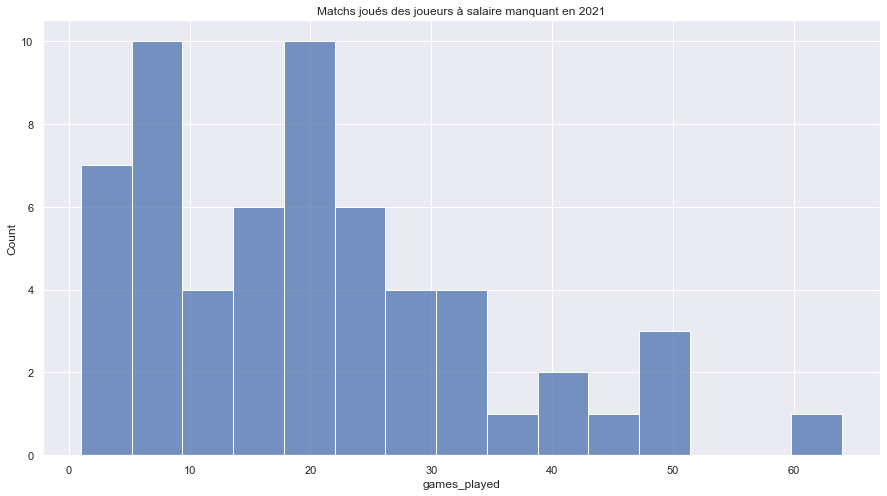

In [154]:
sns.histplot(data = df_21nd[df_21nd['salary'].isnull()], x="games_played", bins=15).set_title('Matchs joués des joueurs à salaire manquant en 2021')
plt.show()

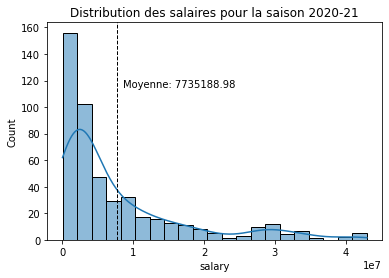

In [64]:
# on prend ici en compte la base de données sans ligne dupliquée
sns.histplot(data = df_21nd,x="salary", kde=True)
plt.axvline(df_21nd['salary'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df_21nd['salary'].mean()*1.1, max_ylim*0.7, 'Moyenne: {:.2f}'.format(df_21nd['salary'].mean()))
plt.title('Distribution des salaires pour la saison 2020-21')
plt.show()

On remarque que la distribution des salaires est très étalée vers la droite, avec des grandes valeurs isolées qui tirent la moyenne vers le haut.

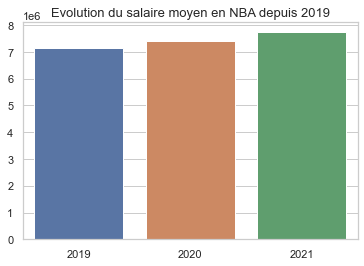

In [88]:
sal = [df_19nd['salary'].mean(), df_20nd['salary'].mean(), df_21nd['salary'].mean()]
sns.set_theme(style="whitegrid")
plt.title('Evolution du salaire moyen en NBA depuis 2019', fontsize=13)
sns.barplot(y=sal,x=['2019','2020','2021'])

On note que le salaire moyen augmente depuis 2019, passant d'environ 7 millions de dollars en 2019 jusqu'à plus de 7,5 millions en 2021.

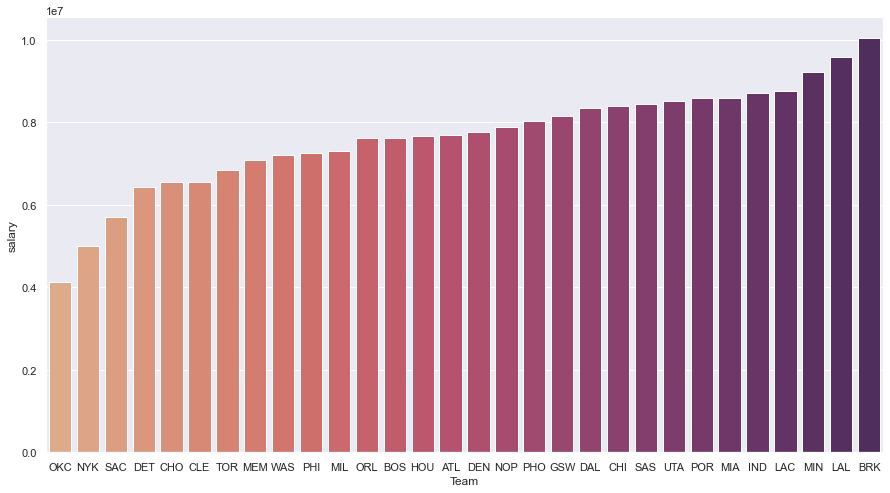

In [122]:
dfmean = df_21.groupby('team')['salary'].mean().sort_values().to_frame()
dfmean['Team'] = dfmean.index
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(data =dfmean, x='Team', y='salary', palette="flare")
plt.show()

Le salaire moyen selon les équipes varie du simple au double : il est de 4 millions pour l'équipe d'Oklahoma City contre 10 millions pour l'équipe de Brooklyn. On reste tout de même dans les mêmes ordres de grandeur, ce qui est prévisible car chaque équipe a un cap qu'elle ne peut pas dépasser lorsqu'elle aloue ses salaires : en pratique la plupart sont souvent très proche de ce cap.

### Variables explicatives retenues

Au basketball, certaines statistiques sont très répandues afin de mesurer l'impact de joueur sur le jeu. Parmi elles, les points marqués, les rebonds pris et les passes décisives délivrées sont les trois statistiques brutes les plus communes au basketball. D'autres statistiques plus avancées existent également, comme le Player Efficiency Rating (PER) qui prend en compte d'autres aspects pour donner un score d'efficacité qui va de 0 à environ 30, ou les Win shares, qui estime le nombre de matchs qu'un joueur fait gagner à son équipe.
Nous allons donc étudier ces variables dans nos données.

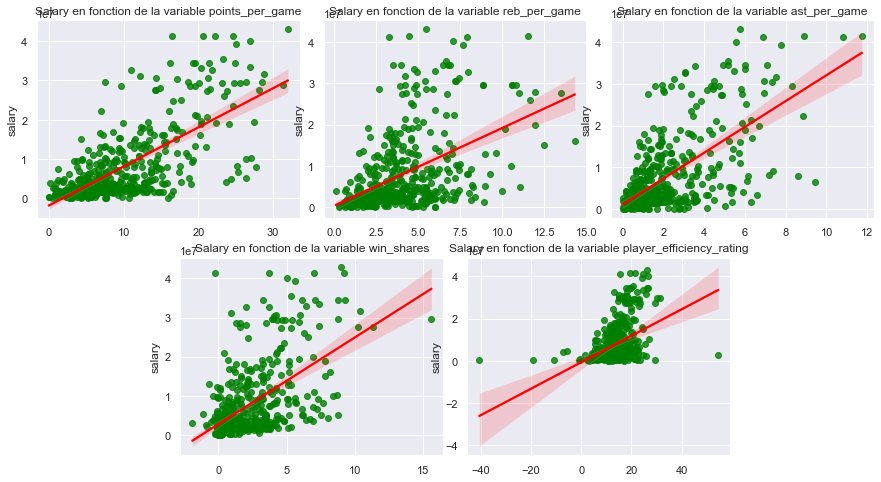

In [153]:
ax1 = plt.subplot2grid((2,6), (0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
l = ['points_per_game','reb_per_game','ast_per_game','win_shares','player_efficiency_rating']
l_ax = [ax1,ax2,ax3,ax4,ax5]
for i,a in enumerate(l_ax) :
    a.title.set_text('Salary en fonction de la variable '+l[i])
for i,elt in enumerate(l):
    sns.regplot(data=df_21nd,x=elt,y="salary",ax=l_ax[i], scatter_kws={"color": "green"}, line_kws={"color": "red"}).set(xlabel=None)
    # j'enlève le nom des variables sur les abcisses car il y a un problème de superposition avec les titres

Pour les 5 variables considérées, on remarque tout d'abord qu'il y a une très grand majorité de points avec des salaires et des variables explicatives faibles : cela peut s'expliquer par la présence d'un grand nombre de joueur lambda qui ne sont pas des stars, et qui composent la majorité des équipes. Ensuite, pour toutes les variables, elles semblent être positivement corrélées au salaire comme on pouvait s'y attendre puisque les bons joueurs, qui sont habituellement mieux payés, sont censés avoir de meilleures statistiques que les moins bons joueurs.